# Algerian_Forest_Fire_EDA
**Life cycle of Machine learning Project**


* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* This dataset comprises data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
* We have to predict that that whether there will be a fire or not in the Algerian Forest on the basis of various given circumstances in the data .
* Prediction results can be used to track the situations of forest fire & take preventive measures to avoid fire in future.

## 2) Data Collection.
* The Dataset is collected from Website- UCI Machine Learning Repository.
* The data consists of 15 column and 244 rows.
* Direct link of dataset- 'https://raw.githubusercontent.com/HUMERANAZ/EDA/main/Algerian_forest_fires_dataset_UPDATE.csv'

### Attribute Information:
* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8 FWI Components
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: two classes,namely Fire and not Fire

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [ ]:
# Importing required libraries for EDA
# The main aim is to understand data in better way

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [94]:
df=pd.read_csv("https://raw.githubusercontent.com/HUMERANAZ/EDA/main/Algerian_forest_fires_dataset_UPDATE.csv", header=1)

**Show Top 5 Records**

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3) Data Cleaning

**Dropping row no 122 specifying region name & 123 respecifying the header**

In [97]:
df.drop(index=[122,123], inplace=True)
df.reset_index(inplace=True) #Resetting the index
df.drop('index',axis=1,inplace=True) #dropping the index column


**Creating a new column called Region representing [Two regions- 'bejaia' and 'Sidi-Bel Abbes']**

In [98]:
df.loc[:122,'region']='bejaia'
df.loc[122:,'region']='Sidi-Bel Abbes'

In [100]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


#### Checking column header

In [102]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

#### Removing unnecessary space in column headers using str.strip()

In [103]:
df.columns=[feature.strip() for feature in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

#### Removing unnecessary space in Classes Features data

In [105]:
df.Classes=df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

**Check Datatypes in the dataset**

In [106]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [107]:
df.loc[165,['DC','ISI','BUI','FWI','Classes']]=[14.6,9,12.5,10.4,'fire'] #Making changes In Row

### Changing Datatypes of the Features

In [108]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(float)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)

df.dtypes


day              int32
month            int32
year             int32
Temperature    float64
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region          object
dtype: object

#### Creating new column as 'Date' and replacing 3 columns (['day','month','year']) as one 'Date' column

In [109]:
df['Date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

#### Resetting 'Date' column index

In [112]:
new_cols = ['Date','Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region']
df=df.reindex(columns=new_cols)

# 4) EPLORING DATA

## 4.1) Profile of the Data

#### Shape of the dataset

In [114]:
df.shape

(244, 13)

* There are 244 rows and 13 columns in this dataset

#### Columns of Dataset

In [121]:
df.columns

Index(['Date', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Detail information of columns

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8 FWI Components
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: two classes,namely Fire and not Fire

#### Checking Missing Values in dataset

In [117]:
df.isnull().sum()

Date           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

### Observation - 
- This dataset doesn't contain any missing value

## Segregating Numerical & Categorical features of dataset

#### Numerical Features

In [122]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print Numerical columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))


We have 11 numerical features : ['Date', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


#### Categorical Features

In [124]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print categorical columns
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 2 categorical features : ['Classes', 'region']


### Proportion of count data on categorical columns

In [131]:
for col in categorical_features:
    print(round(df[col].value_counts(normalize=True) * 100))
    print('---------------------------')

fire        57.0
not fire    43.0
Name: Classes, dtype: float64
---------------------------
bejaia            50.0
Sidi-Bel Abbes    50.0
Name: region, dtype: float64
---------------------------


### Observations:-
* more chances of fire predicted in this dataset i.e. approx 57%
* 43% chances occured when forest didn't catch fire


### Checking in  which region more fire occured

In [144]:
print("bejaia- \n",df[df['region']=='bejaia']['Classes'].value_counts())
print("Sidi-Bel Abbes-\n",df[df['region']=='Sidi-Bel Abbes']['Classes'].value_counts())

bejaia- 
 not fire    63
fire        59
Name: Classes, dtype: int64
Sidi-Bel Abbes-
 fire        79
not fire    43
Name: Classes, dtype: int64


#### Observation:
* Sidi-Bel Abbes is more fire prone than bejaia because 79 times fire occured here

## Statistical Analysis

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


#### Predictions:
* There is huge differences between mean and max values for some of the features so outliers must be there. I'll further analyse the data.

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Univariate Analysis of Numerical Features

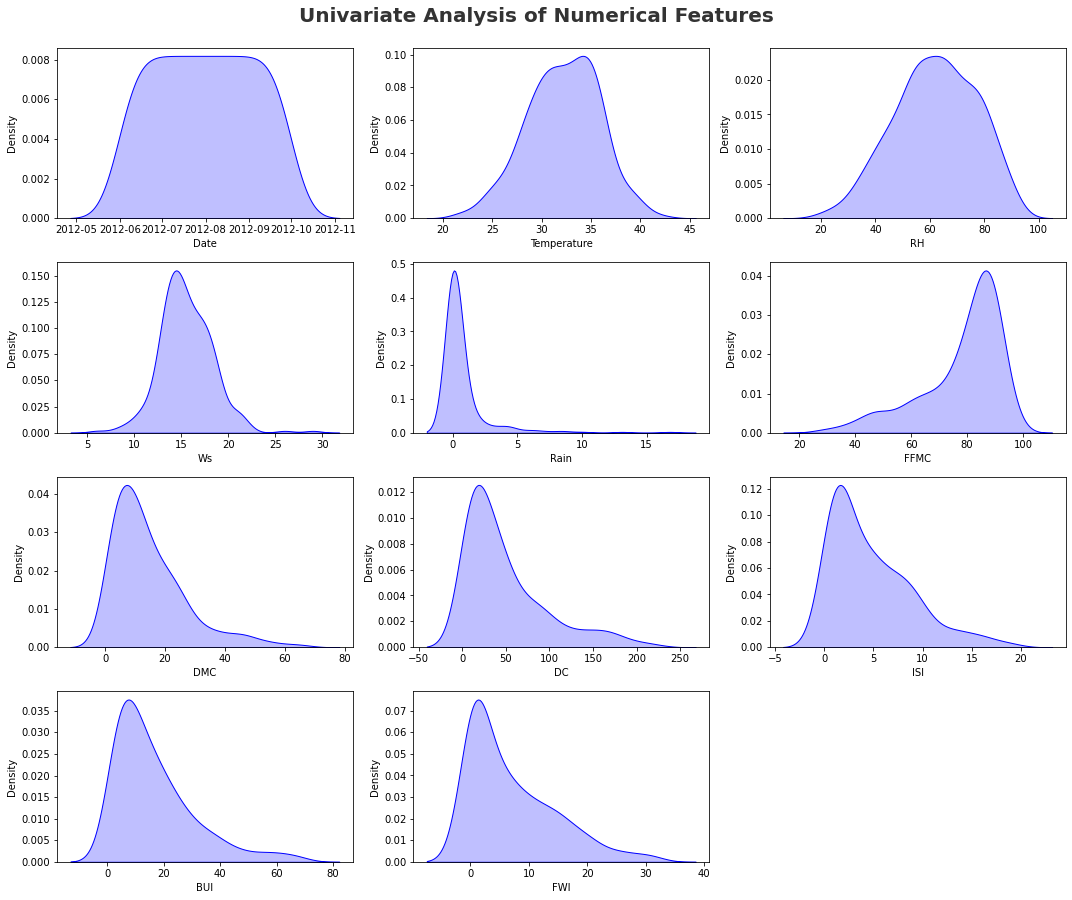

In [149]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report:
* Rain,DMC,DC,ISI,BUI and FWI are right skewed and postively skewed.
* FFMC is left skewed and negatively skewed.
* Outliers are present in Rain,DMC,DC,ISI,BUI,FWI and FFMC

### Univariate Analysis of Numerical Features

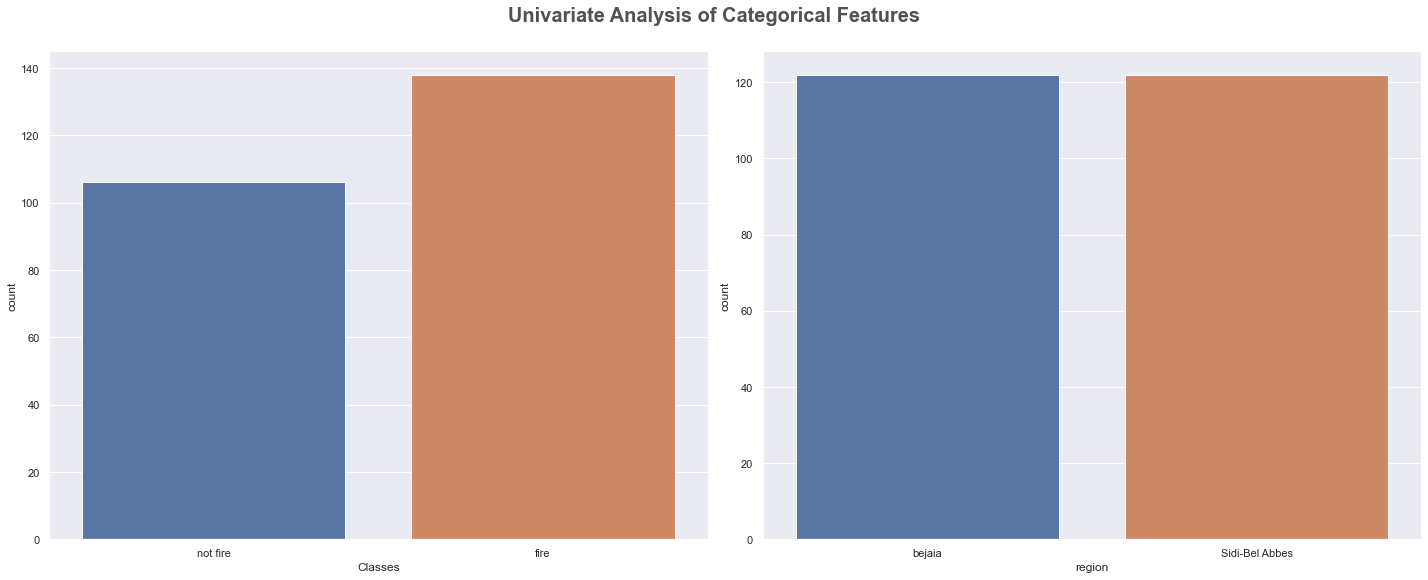

In [169]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=0)
    plt.tight_layout()

#### Observation:
* There were more days when forest catch fire than those when fores didn't catch fire.
* Equal data is present for both the cities.

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

#### Check correlations of all numeric features

In [159]:
df[numeric_features].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


#### Heatmap observation of correlation of all features

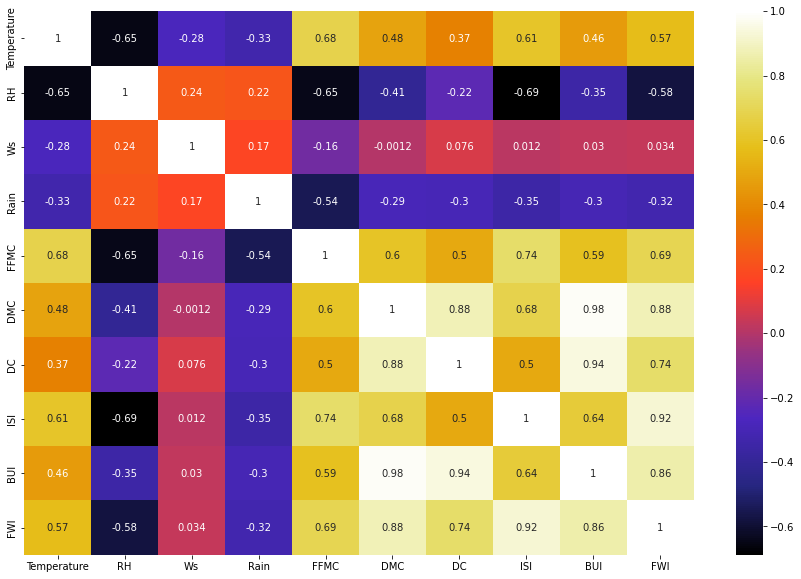

In [160]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

#### Observation:
* Strongly positive correlated features are BUI & DMC, BUI & DC and FWI & ISI.
* very weakly negative correlated features are RH and Temp, RH and FFMC, RH and ISI

### strip plot to see the relationship between numerical features and target feature

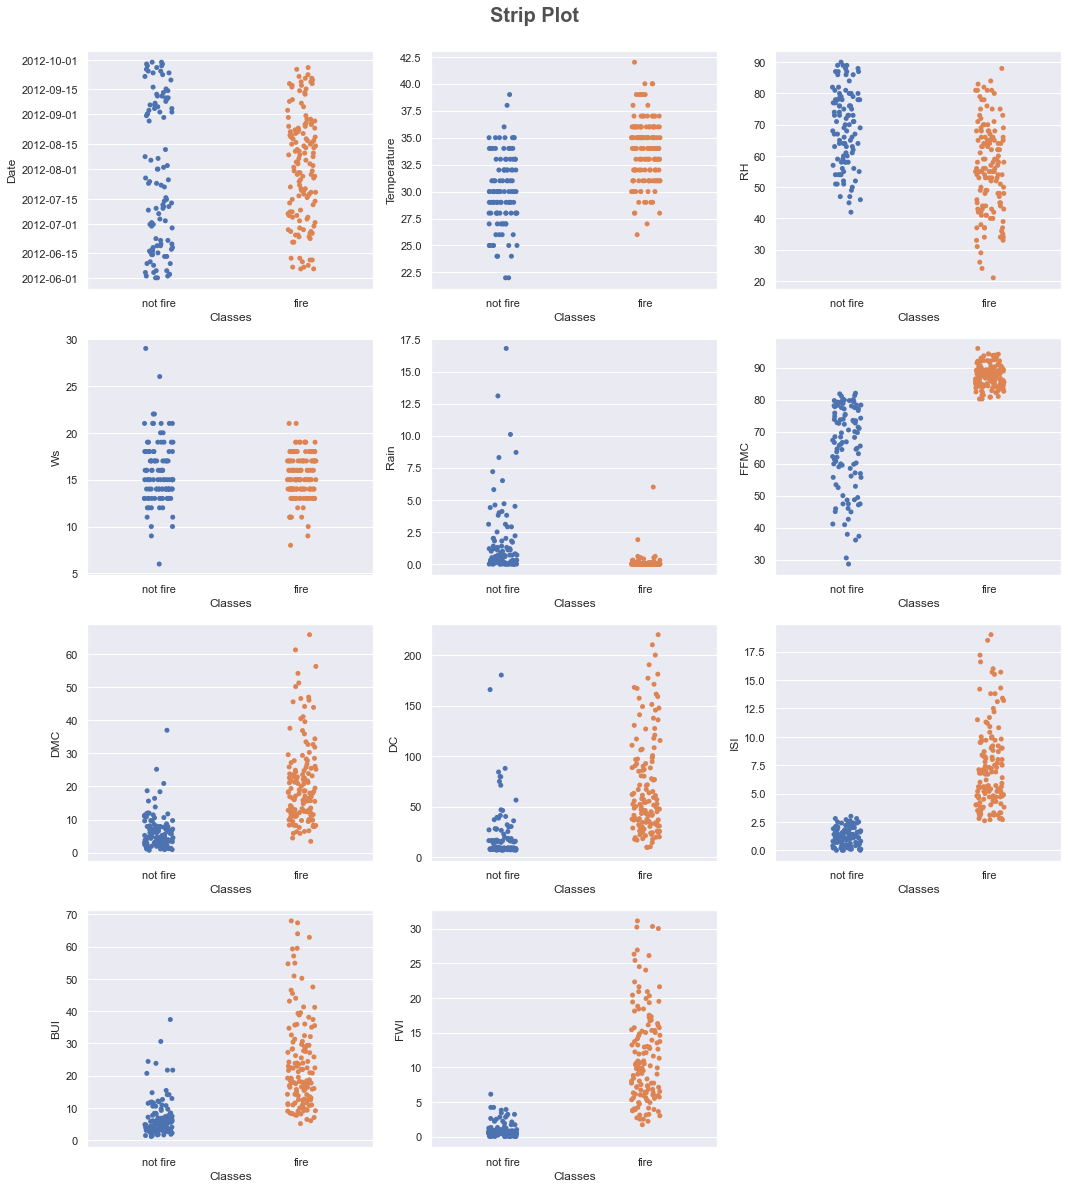

In [168]:
plt.figure(figsize=(15,20))

plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numeric_features[i], x='Classes', data=df)
    plt.tight_layout()

#### Observations:
* high temperature means more fire occurs
* if FFMC>80 then forest catch fire 
* if FWI<2.5 then no chance of fire in place
* if ISI<2.5 then no chance of fire in place


### Boxplot to find Outliers in Numeric Features

<AxesSubplot:>

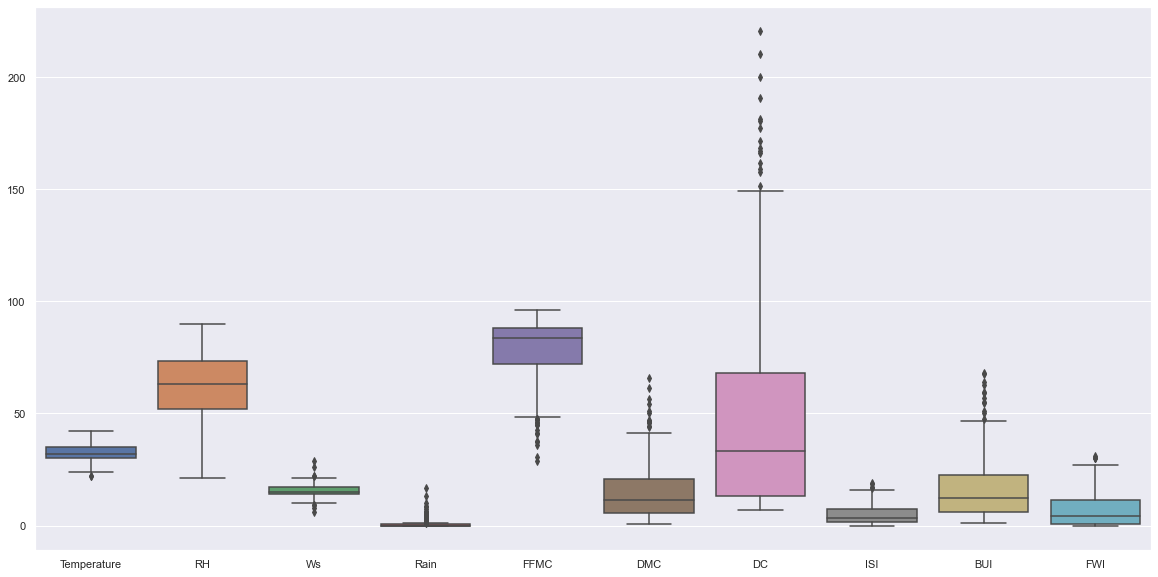

In [176]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = df[numeric_features],orient="v")


#### Observations:
* Rain, FFMC, DMC, DC and BUI has many outliers

### Checking Temperature distribution using histogram

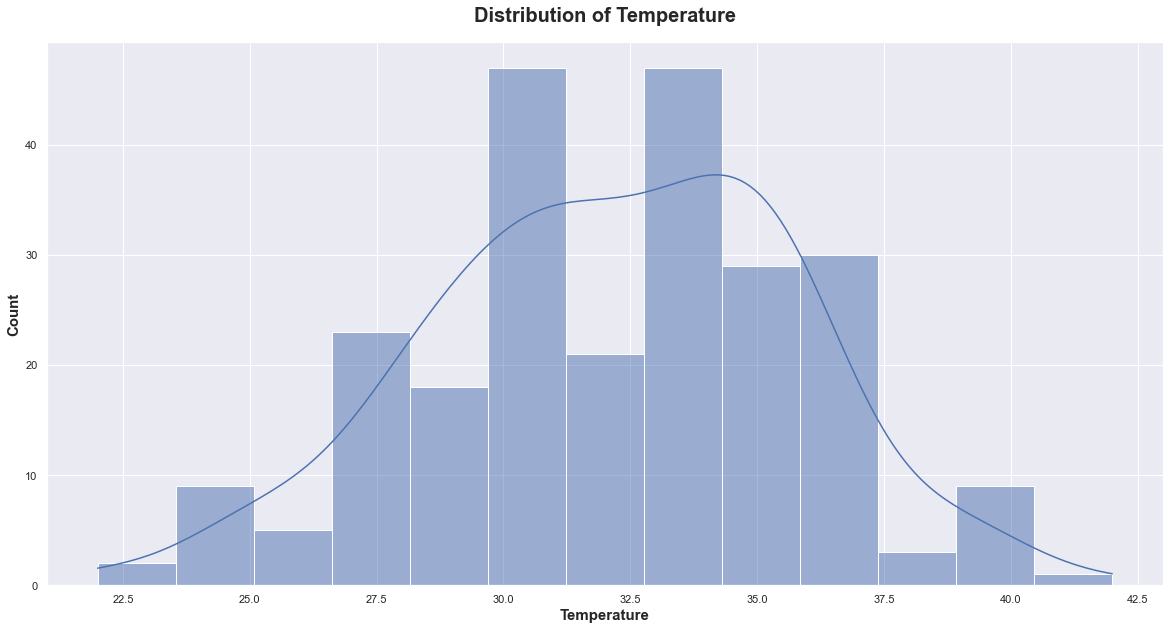

In [175]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

<AxesSubplot:>

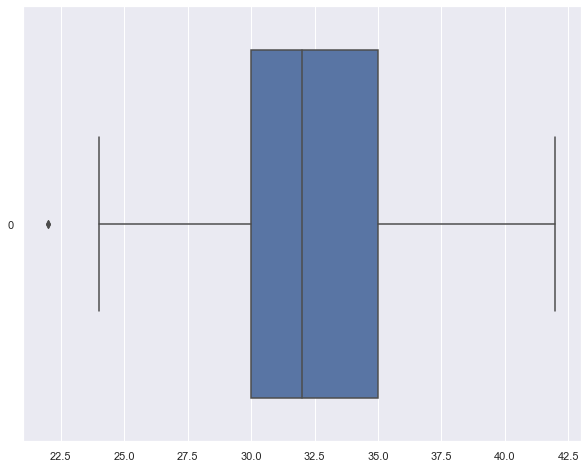

In [181]:
plt.subplots(figsize=(10,8))
sns.boxplot(data = df['Temperature'],orient="h")


### Observation:
* Most of the time temperature ranges between 30 to 35

### Pair Plot for multivariate analysis of all features

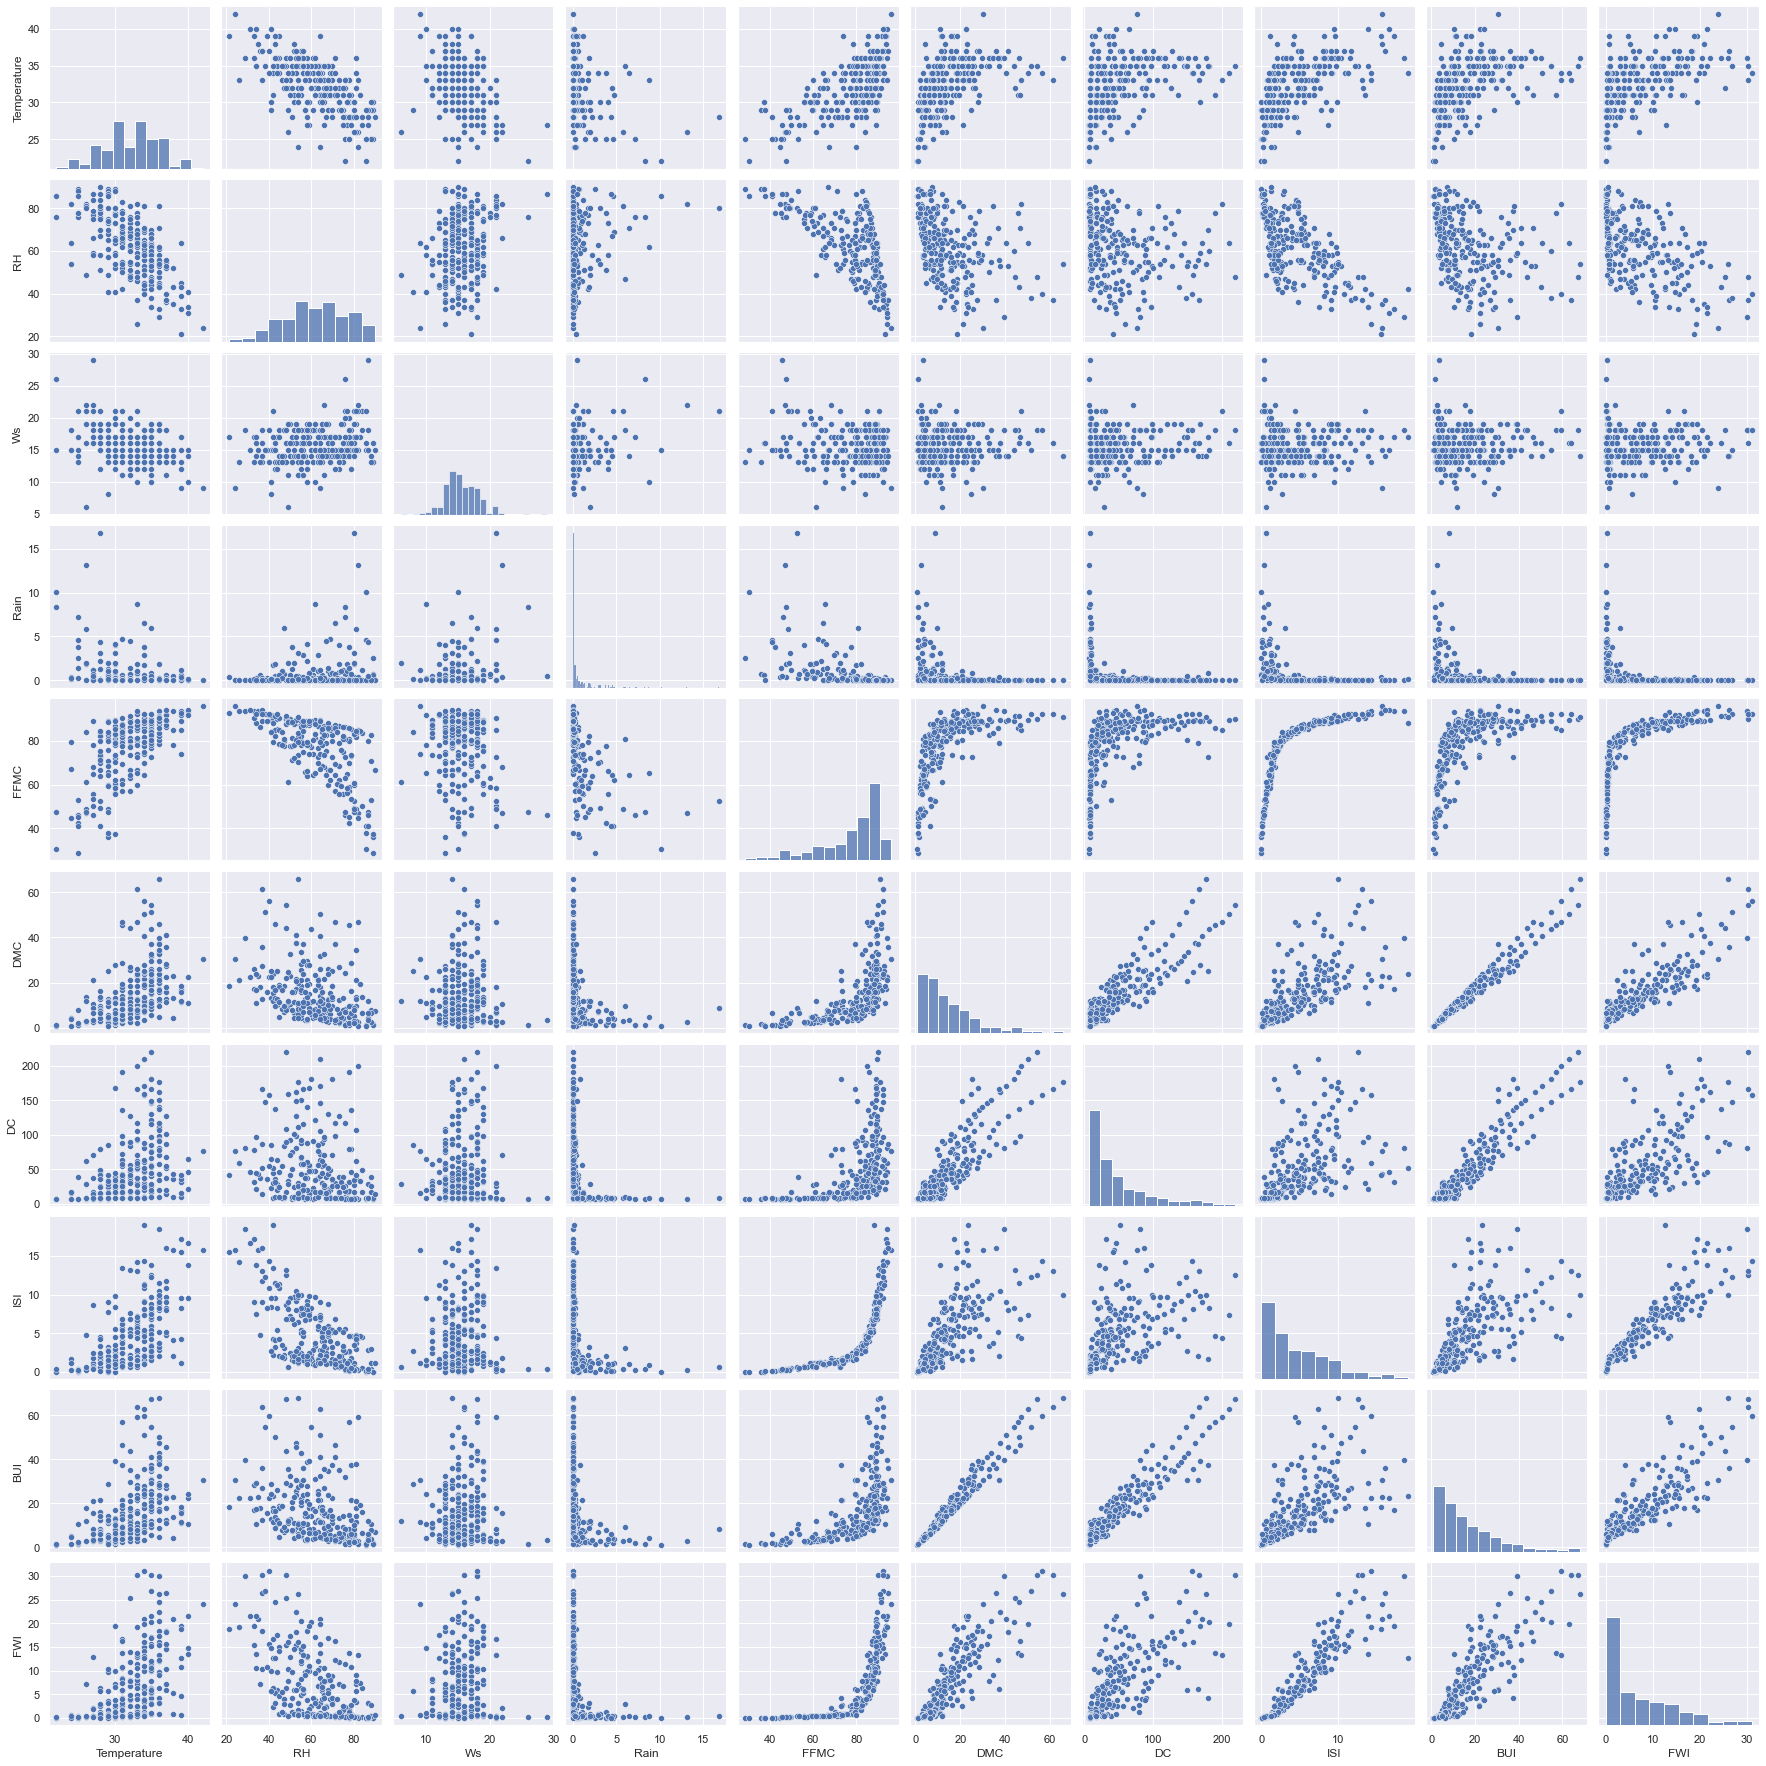

In [183]:
sns.pairplot(data=df)

### Which region more times rain occurs:Visualising through barplot

<AxesSubplot:xlabel='region', ylabel='Rain'>

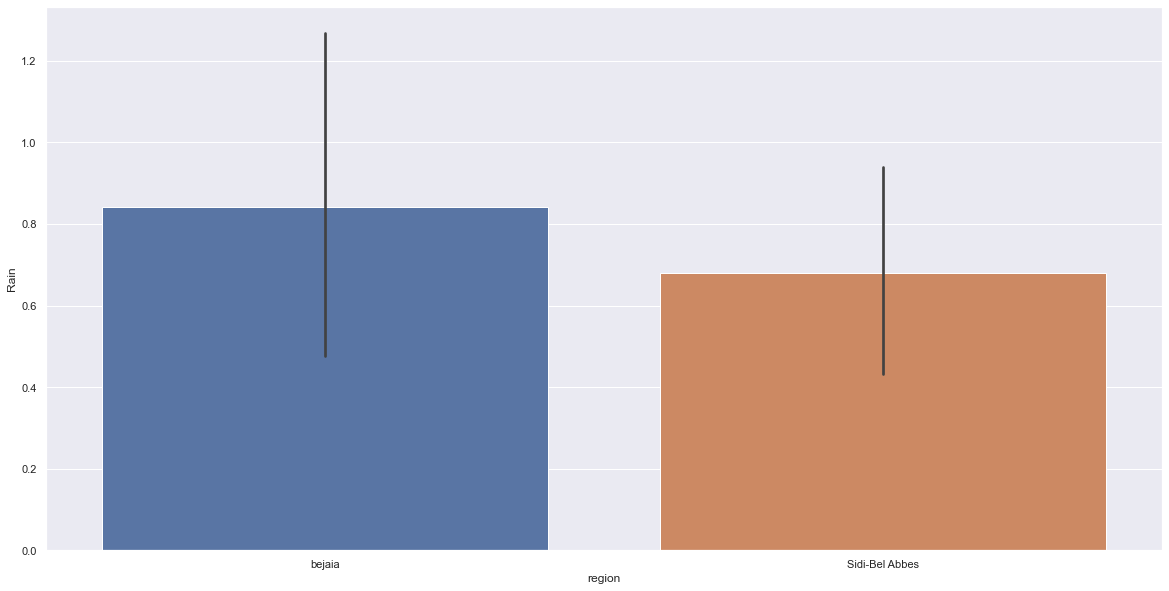

In [188]:
sns.barplot(x="region",y="Rain",data=df)

#### Observation:
* Bejaia region has more rainy days than other

<AxesSubplot:ylabel='Temperature'>

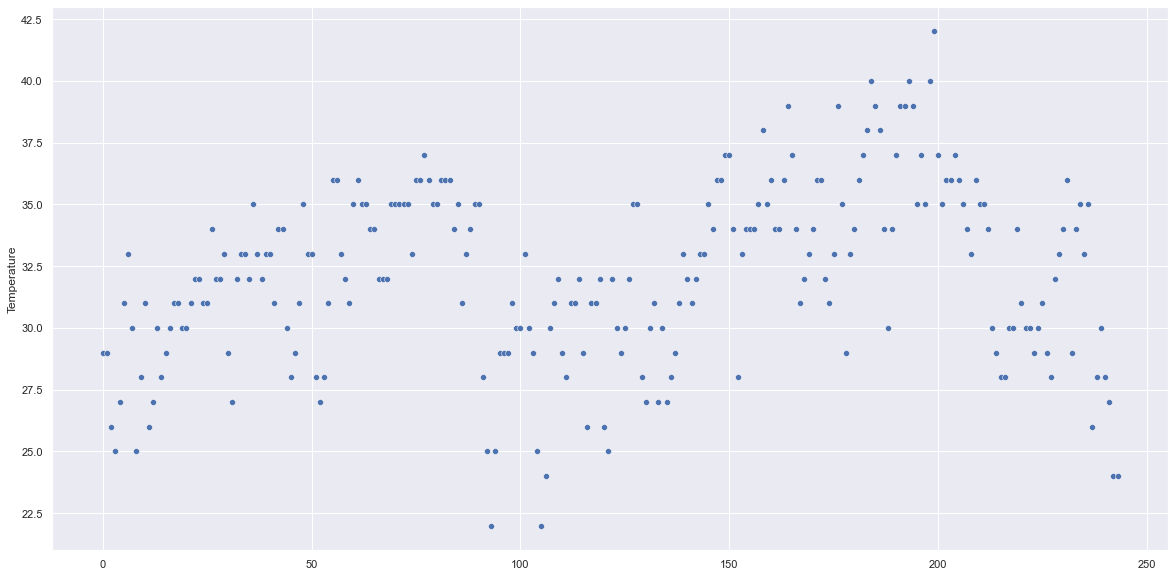

In [194]:
 sns.scatterplot(y=df.Temperature, x=df.index, data=df)

#### Observation:
* Highest temperature recorded is 42

## Final Report

* The datatypes and Column names were right and there was 24 rows and 13 columns
* The `Classes` column is the target columns to predict for fire or not fire. i.e logistic Regression Problem.
* There are outliers in Rain, FFMC, DMC, DC and BUI Features .
* Fire occurs more when temperature is high.
* More fire occurs in Sidi-Bel-Abbes region.
* Skewness is found in few of the columns will check it after handling outliers.
* More rain occurs in bejaia region.
* Temperature is in between 30-35 most of the days
* Highest temperature recorded is 42

In [ ]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################